In [13]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [14]:
##breast cancer training dataset from GSE2034
dataframe = pd.read_csv('data/filter_set_gcrma.csv',index_col=0)	
array = dataframe.values
X= array[:,0:1246] ##1246 variable genes
y=array[:,1311] ##labels

In [15]:
##split data set into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)


In [16]:
## Create a base decision tree.
clf = tree.DecisionTreeClassifier(class_weight="balanced")
clf_boosted = AdaBoostClassifier(base_estimator=clf,random_state = 7)
clf_boosted.fit(X_train,y_train)
y_pred=clf_boosted.predict(X_test)
print("Accuracy: %.2f"  % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.79


In [17]:
dataframe = pd.read_csv('data/filter_set_gcrma_test.csv',index_col=0)
array = dataframe.values
X_test2= array[:,0:1246]
y_test2=array[:,1246]
y_pred2=clf_boosted.predict(X_test2)
y_pred2_prob=clf_boosted.predict_proba(X_test2)
print("Accuracy: %.2f"  % metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.86


In [18]:
## Print confusion matrix.
## Contains True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FP)	
cfs = metrics.confusion_matrix(y_test2, y_pred2)
print(cfs)
TP = cfs[1, 1]
TN = cfs[0, 0]
FP = cfs[0, 1]
FN = cfs[1, 0]

[[ 17  23]
 [  4 145]]


In [19]:
## Get the recall, which is the TP/(TP+FN)
print("Sensitivity: %.2f"  % metrics.recall_score(y_test2, y_pred2))

Sensitivity: 0.97


In [20]:
## Get the precision, which is the TP/(TP+FP)
print("Precision: %.2f"  % metrics.precision_score(y_test2, y_pred2))

Precision: 0.86


In [21]:
## Get the specificity, which is the TN/(TN+FP)
specificity = float(TN) / float(TN + FP)
print("Specificity: %.2f"  % specificity)


Specificity: 0.42


In [22]:
print(metrics.roc_auc_score(y_test2, y_pred2_prob[:,1]))

0.6990771812080537


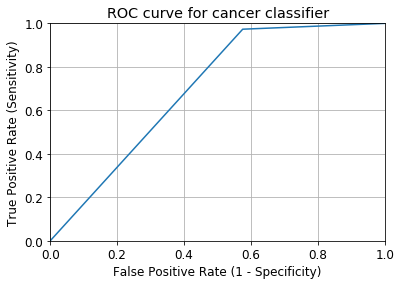

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred2_prob[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

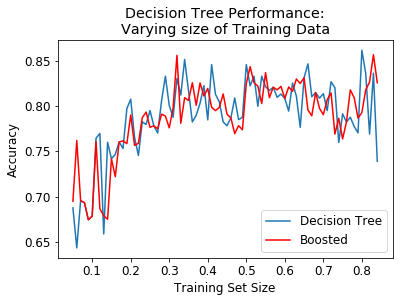

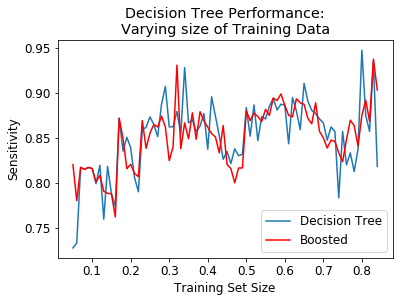

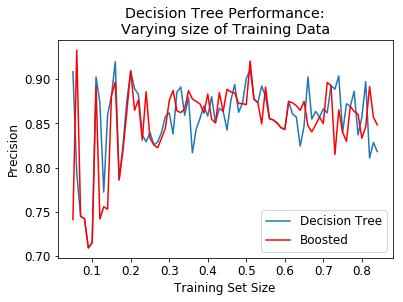

In [26]:
## Compare boosted decision tree's performance to decision tree's 
dataframe = pd.read_csv('data/filter_set_gcrma.csv',index_col=0)	
array = dataframe.values
X= array[:,0:1246]
y=array[:,1311]	
boosted_scores = []
scores = []
boosted_sense = []
sense = []
boosted_prec = []
prec =[]
train_size = np.arange(0.05,0.85,0.01)
for i in train_size:
	X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=7)
	clf = tree.DecisionTreeClassifier(class_weight="balanced")
	clf_boosted = AdaBoostClassifier(base_estimator=clf,random_state = 7)
	clf_boosted= clf_boosted.fit(X_train,y_train)
	pred = clf_boosted.predict(X_test)
	boosted_scores.append(metrics.accuracy_score(pred,y_test))
	boosted_sense.append(metrics.recall_score(pred,y_test))
	boosted_prec.append(metrics.precision_score(pred,y_test))
	clf = clf.fit(X_train,y_train)
	pred = clf.predict(X_test)
	scores.append(metrics.accuracy_score(pred,y_test))
	sense.append(metrics.recall_score(pred,y_test))
	prec.append(metrics.precision_score(pred,y_test))
	
reg, = plt.plot(train_size,scores,"-",label="Decision Tree")
boost, = plt.plot(train_size,boosted_scores,"-",color="red",label="Boosted")
plt.title('Decision Tree Performance:\nVarying size of Training Data')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(handles=[reg,boost])
plt.show()

reg, = plt.plot(train_size,sense,"-",label="Decision Tree")
boost, = plt.plot(train_size,boosted_sense,"-",color="red",label="Boosted")
plt.title('Decision Tree Performance:\nVarying size of Training Data')
plt.xlabel('Training Set Size')
plt.ylabel('Sensitivity')
plt.legend(handles=[reg,boost])
plt.show()

reg, = plt.plot(train_size,prec,"-",label="Decision Tree")
boost, = plt.plot(train_size,boosted_prec,"-",color="red",label="Boosted")
plt.title('Decision Tree Performance:\nVarying size of Training Data')
plt.xlabel('Training Set Size')
plt.ylabel('Precision')
plt.legend(handles=[reg,boost])
plt.show()